In [66]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
chirag19_air_passengers_path = kagglehub.dataset_download('chirag19/air-passengers')

print('Data source import complete.')


Data source import complete.


<a class="anchor" id="0"></a>
# **Tutorial : Time Series Forecasting with Prophet**



Hello friends,


In the previous notebooks, we have discussed [Time Series Analysis with Python](https://www.kaggle.com/prashant111/complete-guide-on-time-series-analysis-in-python) and [ARIMA Model for Time Series Forecasting](https://www.kaggle.com/prashant111/arima-model-for-time-series-forecasting). In this notebook, we will make a time series forecast using Facebook’s time series model [Prophet](https://facebook.github.io/prophet/). First up, we will discuss [Prophet](https://facebook.github.io/prophet/),  its advantages and make a time series forecast with [Prophet](https://facebook.github.io/prophet/).


So, let's get started.

<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Introduction to Prophet](#1)
2.	[Advantages of Prophet](#2)
3.	[Installation of Prophet](#3)
4.	[Python API](#4)
5.	[Basic Setup](#5)
6.	[Time Series Forecasting with Prophet](#6)
7.	[Plotted the forecasted components](#7)
8.	[Adding ChangePoints to Prophet](#8)
9.	[Adjusting Trend](#9)
10.	[Conclusion](#10)
11.	 [References](#11)



# **1. Introduction to Prophet** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


The official [Prophet](https://facebook.github.io/prophet/) homepage states that-

   *Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.*

   *Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.*


- So, [Prophet](https://facebook.github.io/prophet/) is the facebooks’ open source tool for making time series predictions.

- [Prophet](https://facebook.github.io/prophet/) decomposes time series data into trend, seasonality and holiday effect.

- **Trend** models non periodic changes in the time series data.

- **Seasonality** is caused due to the periodic changes like daily, weekly, or yearly seasonality.

- **Holiday effect** which occur on irregular schedules over a day or a period of days.

- **Error terms** is what is not explained by the model.



# **2. Advantages of Prophet** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)



[Prophet](https://facebook.github.io/prophet/) has several advantages associated with it. These are given below:-

- **1. Accurate and fast** - Prophet is accurate and fast. It is used in many applications across Facebook for producing reliable forecasts for planning and goal setting.


- **2. Fully automatic** - Prophet is fully automatic. We will get a reasonable forecast on messy data with no manual effort.


- **3. Tunable forecasts** - Prophet produces adjustable forecasts. It includes many possibilities for users to tweak and adjust forecasts. We can use human-interpretable parameters to improve the forecast by adding our domain knowledge.


- **4. Available in R or Python** - We can implement the Prophet procedure in R or Python.



- **5. Handles seasonal variations well** - Prophet accommodates seasonality with multiple periods.



- **6. Robust to outliers** - It is robust to outliers. It handles outliers by removing them.



- **7. Robust to missing data** - Prophet is resilient to missing data.

# **3. Installation of Prophet** <a class="anchor" id="3"></a>


[Table of Contents](#0.1)



- We can install Prophet using either command prompt or Anaconda prompt using pip as follows-

In [67]:
%pip install plotly
%pip install prophet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# **4. Python API** <a class="anchor" id="4"></a>


[Table of Contents](#0.1)


- [Prophet](https://facebook.github.io/prophet/docs/quick_start.html#python-api) follows the sklearn model API.

- First up, we create an instance of the Prophet class and then call its fit and predict methods.

- **The input to Prophet is always a dataframe with two columns** - **ds** and **y**.

- The **ds (datestamp)** column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

- The **y** column must be numeric, and represents the measurement we wish to forecast.

# **5. Basic Setup** <a class="anchor" id="5"></a>


[Table of Contents](#0.1)


- Now wel will dive right in and see how to make time series predictions using Prophet.

- We will explore the change points, how to include holidays and then add multiple regressors.

- First up, we will import the required libraries and the data.

### **Import libraries**

In [68]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py # type: ignore

py.init_notebook_mode(connected=True) 

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

### **Import data**

In [70]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
os.path


<module 'ntpath' from 'c:\\Users\\user\\anaconda3\\envs\\tf\\lib\\ntpath.py'>

In [71]:
# file = '/kaggle/input//air-passengers/AirPassengers.csv'
# file = '/kaggle/input/air-passengers/AirPassengers.csv.csv'
file = os.path.join(chirag19_air_passengers_path, 'AirPassengers.csv')

df = pd.read_csv(file)

### **Preview dataset**

In [72]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We should rename the column name `#Passenegrs` as `AirPassengers`

In [73]:
df.rename(columns = {'#Passengers':'AirPassengers'}, inplace = True)

### **Summary of dataset**



Now, we will print the information about the dataset that will tell us about the columns, data type of the columns and whether the column is null or not null.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          144 non-null    object
 1   AirPassengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


- We can see that the dataset contains a `Month` and `AirPassengers` column.

- Their data types are `object` and `int64` respectively.

- The [Prophet](https://facebook.github.io/prophet/) library expects as input a dataframe with one column containing the time information, and another column containing the metric that we wish to forecast.

- The important thing to note is that, the `Month` column must be of the datetime type. But, we can see that it is of `object` data type. Now, because the `Month` column is not of the datetime type. So, we’ll need to convert it into datetime type.

In [75]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

We can now see that our `Month` column is of the correct datetime type.

- [Prophet](https://facebook.github.io/prophet/) also imposes the strict condition that the input columns must be named as **ds (the time column)** and **y (the metric column)**.

- So, we must rename the columns in our dataframe.

In [76]:
df = df.rename(columns={'Month': 'ds',
                        'AirPassengers': 'y'})

df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


We can see that the column names are renamed accordingly.

### **Visualize the data**


Now, it is considered a good practice to visualize the data at hand. So let’s plot our time series data:

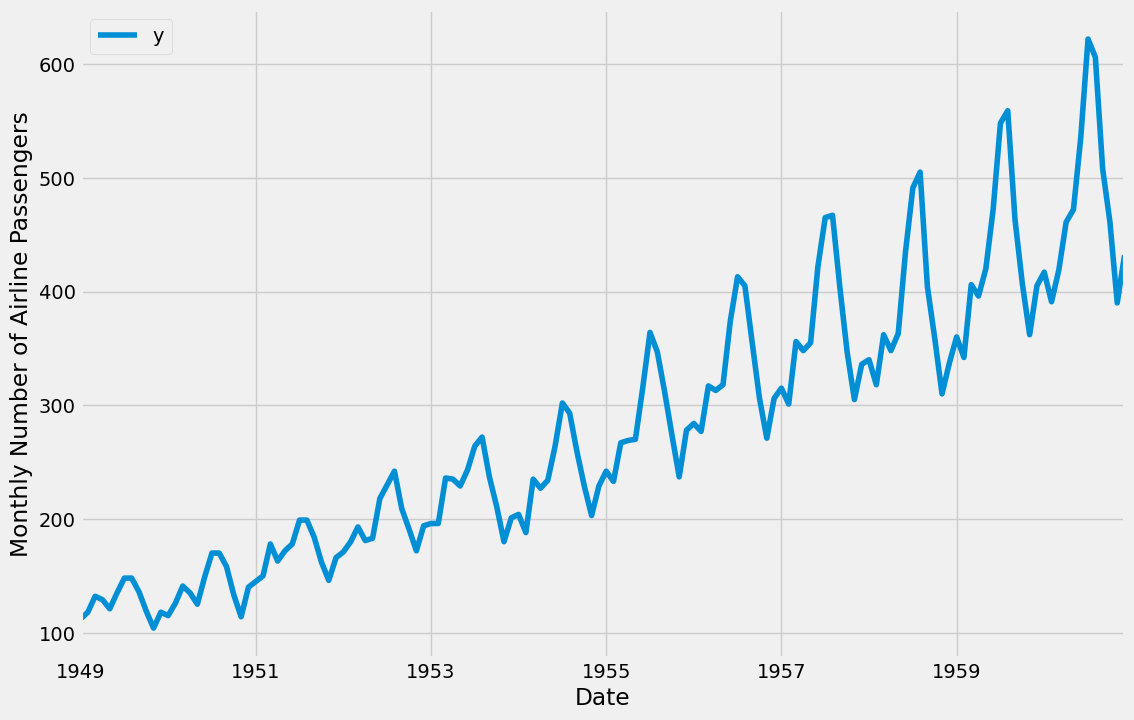

In [77]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

Now, our dataset is prepared and we are ready to use the Prophet library to produce forecasts of our time series.

# **6. Time Series Forecasting with Prophet** <a class="anchor" id="6"></a>


[Table of Contents](#0.1)


- Now, we will describe how to use the [Prophet](https://facebook.github.io/prophet/) library to predict future values of our time series data.

- The developers of [Prophet](https://facebook.github.io/prophet/) have made it more intuitive for analysts and developers alike to work with time series data.

- To begin, we must instantiate a new Prophet object. Prophet enables us to specify a number of arguments. For example, we can specify the desired range of our uncertainty interval by setting the `interval_width parameter`.


In [78]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

- Now that our Prophet model has been initialized, we can call its `fit` method with our DataFrame as input.

In [79]:
my_model.fit(df)

13:07:08 - cmdstanpy - INFO - Chain [1] start processing
13:07:08 - cmdstanpy - INFO - Chain [1] done processing


- In order to obtain forecasts of our time series, we must provide Prophet with a new DataFrame containing a `ds` column that holds the dates for which we want predictions.

- Conveniently, we do not have to concern ourselves with manually creating this DataFrame, as Prophet provides the `make_future_dataframe` helper function.

In [80]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01


- In the code snippet above, we instructed Prophet to generate 36 datestamps in the future.

- When working with Prophet, it is important to consider the frequency of our time series.

- Because we are working with monthly data, we clearly specified the desired frequency of the timestamps (in this case, `MS` is the start of the month).

- Therefore, the `make_future_dataframe` generated 36 monthly timestamps for us.

- In other words, we are looking to predict future values of our time series 3 years into the future.

- The DataFrame of future dates is then used as input to the predict method of our fitted model.

In [81]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,84.814159,43.030114,126.233866
1,1949-02-01,78.227931,32.416734,122.957895
2,1949-03-01,110.342237,66.590954,156.625579
3,1949-04-01,107.810718,64.319213,151.426739
4,1949-05-01,111.266255,68.773150,155.002457


Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting. These are:

  - **ds**: the datestamp of the forecasted value
  - **yhat**: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
  - **yhat_lower**: the lower bound of our forecasts
  - **yhat_upper**: the upper bound of our forecasts

- A variation in values from the output presented is to be expected as Prophet relies on **Markov chain Monte Carlo (MCMC)** methods to generate its forecasts.

- MCMC is a stochastic process, so values will be slightly different each time.

- Prophet also provides a convenient function to quickly plot the results of our forecasts as follows:

c:\Users\user\anaconda3\envs\tf\lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\user\anaconda3\envs\tf\lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



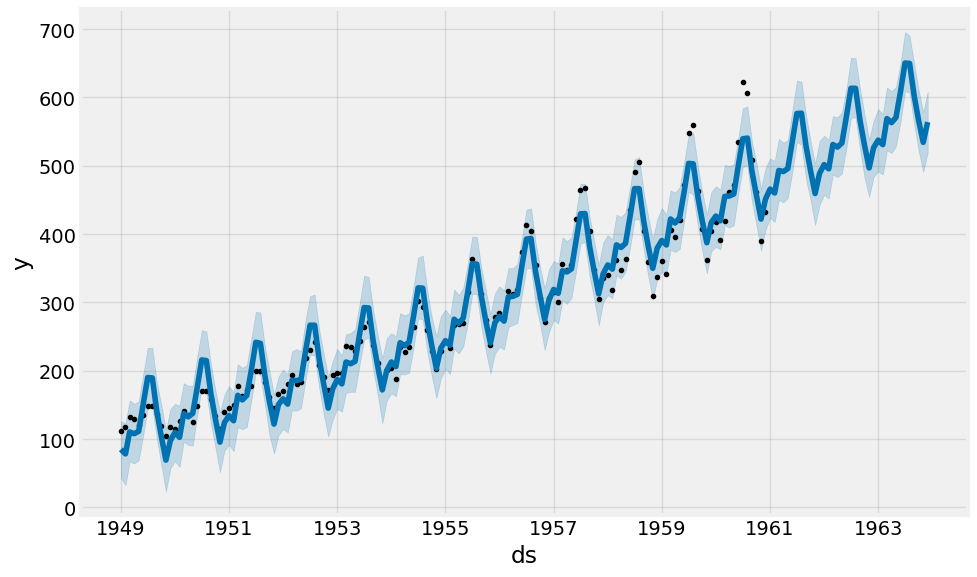

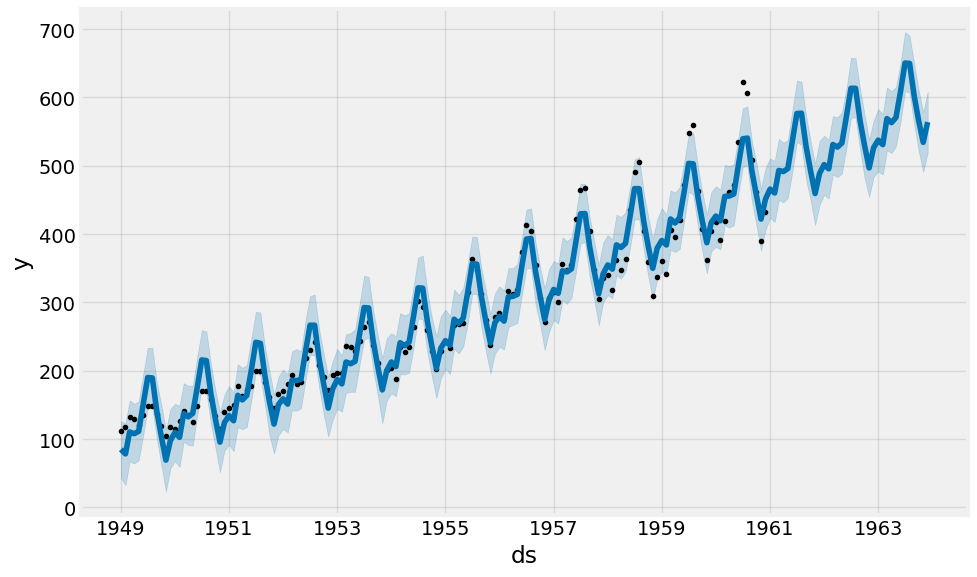

In [82]:
my_model.plot(forecast, uncertainty=True)

- Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).

- One other particularly strong feature of Prophet is its ability to return the components of our forecasts.

- This can help reveal how daily, weekly and yearly patterns of the time series contribute to the overall forecasted values.

c:\Users\user\anaconda3\envs\tf\lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\user\anaconda3\envs\tf\lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\user\anaconda3\envs\tf\lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



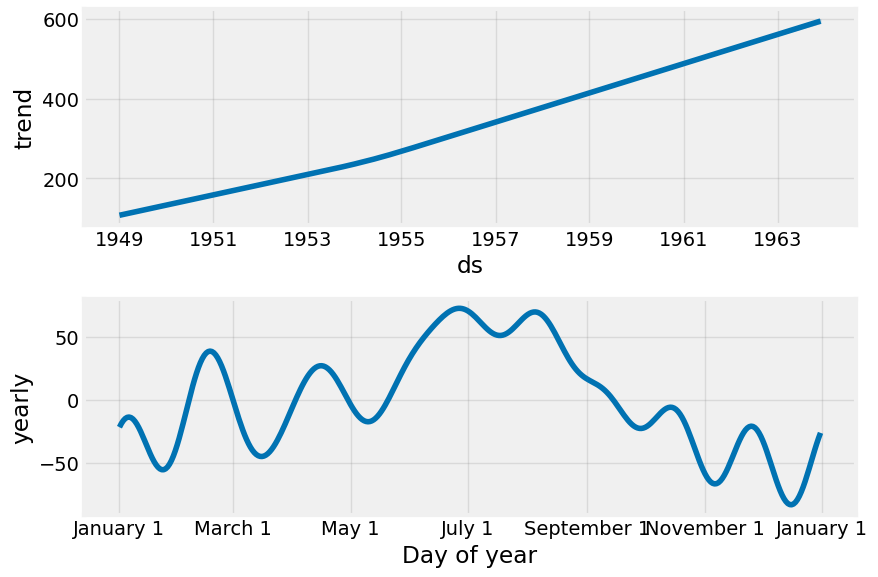

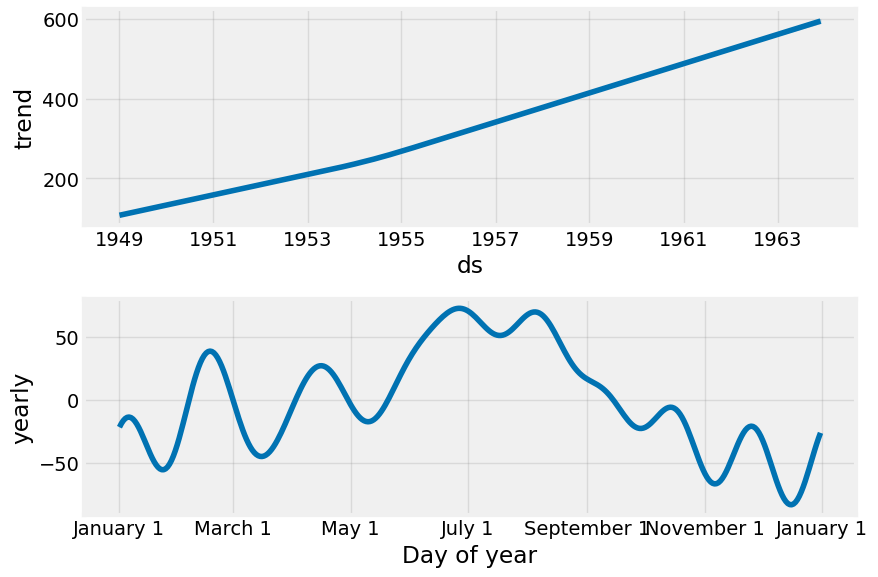

In [83]:
my_model.plot_components(forecast)

- The above plot provides interesting insights.

- The first plot shows that the monthly volume of airline passengers has been linearly increasing over time.

- The second plot highlights the fact that the weekly count of passengers peaks towards the end of the week and on Saturday.

- The third plot shows that the most traffic occurs during the holiday months of July and August.

# **7. Plotting the forecasted components** <a class="anchor" id="7"></a>


[Table of Contents](#0.1)



- We can plot the trend and seasonality, components of the forecast as follows:

c:\Users\user\anaconda3\envs\tf\lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\user\anaconda3\envs\tf\lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\user\anaconda3\envs\tf\lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



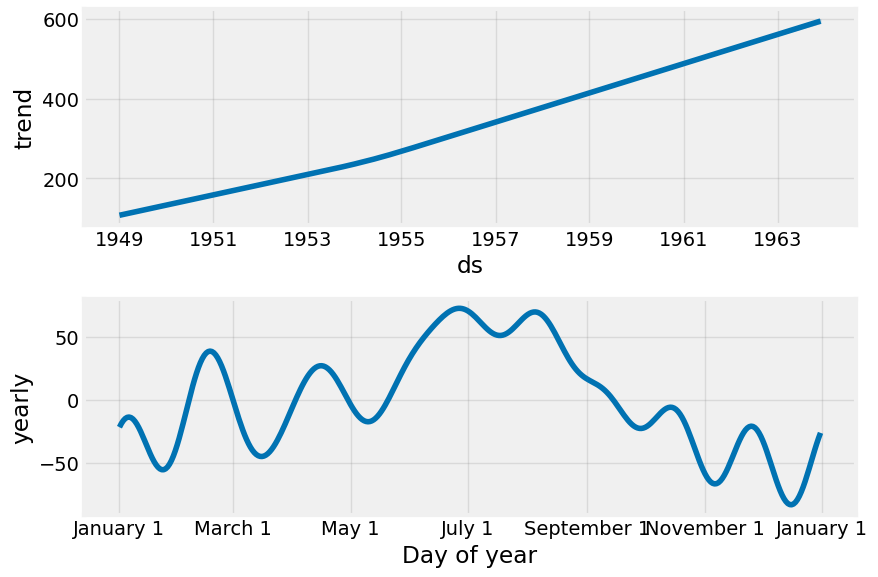

In [84]:
fig1 = my_model.plot_components(forecast)

# **8. Adding ChangePoints to Prophet** <a class="anchor" id="8"></a>


[Table of Contents](#0.1)


- Changepoints are the datetime points where the time series have abrupt changes in the trajectory.

- By default, Prophet adds 25 changepoints to the initial 80% of the data-set.

- Let’s plot the vertical lines where the potential changepoints occurred.

c:\Users\user\anaconda3\envs\tf\lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\user\anaconda3\envs\tf\lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



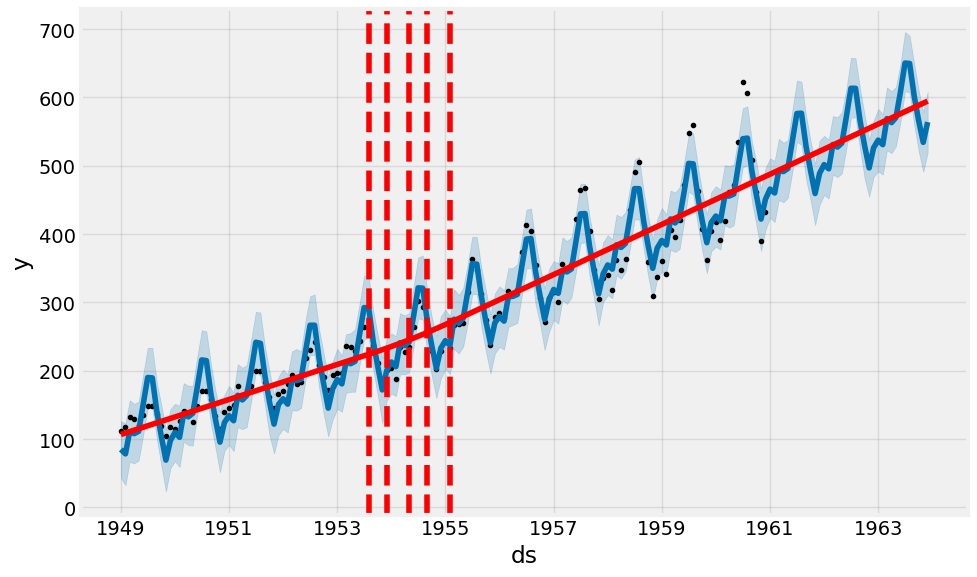

In [85]:
from prophet.plot import add_changepoints_to_plot

# 1. Plot the forecast (creates the figure 'fig')
fig = my_model.plot(forecast)

# 2. Add the changepoints using the function for your Prophet version
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)

# 3. **Show the plot** to display the result
plt.show()


We can view the dates where the chagepoints occurred.

In [86]:
my_model.changepoints

5     1949-06-01
9     1949-10-01
14    1950-03-01
18    1950-07-01
23    1950-12-01
27    1951-04-01
32    1951-09-01
36    1952-01-01
41    1952-06-01
46    1952-11-01
50    1953-03-01
55    1953-08-01
59    1953-12-01
64    1954-05-01
68    1954-09-01
73    1955-02-01
78    1955-07-01
82    1955-11-01
87    1956-04-01
91    1956-08-01
96    1957-01-01
100   1957-05-01
105   1957-10-01
109   1958-02-01
114   1958-07-01
Name: ds, dtype: datetime64[ns]

- We can change the inferred changepoint range by setting the *changepoint_range*

13:07:12 - cmdstanpy - INFO - Chain [1] start processing
13:07:12 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\user\anaconda3\envs\tf\lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\user\anaconda3\envs\tf\lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



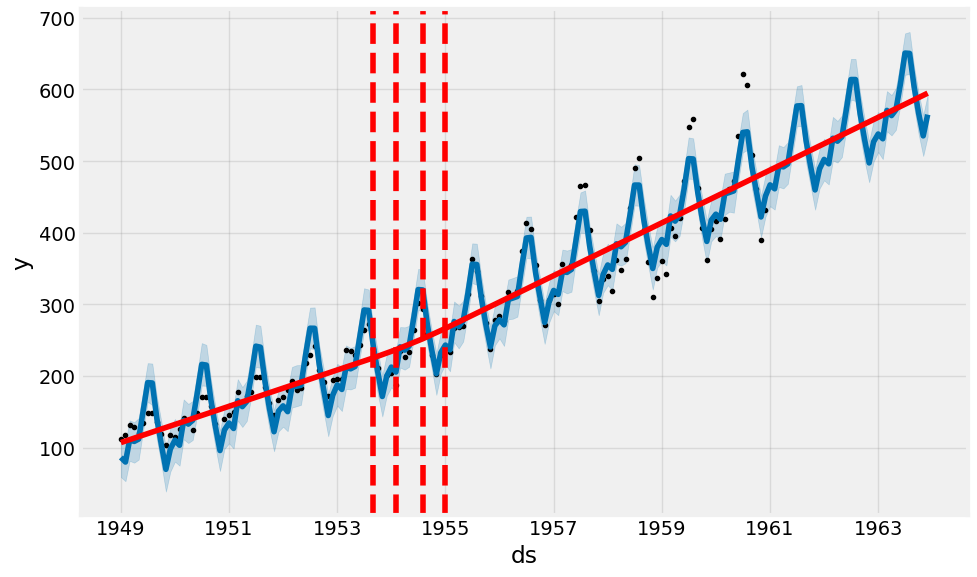

In [87]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

The number of changepoints can be set by using the *n_changepoints* parameter when initializing prophet.

13:08:45 - cmdstanpy - INFO - Chain [1] start processing
13:08:45 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\user\anaconda3\envs\tf\lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\user\anaconda3\envs\tf\lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



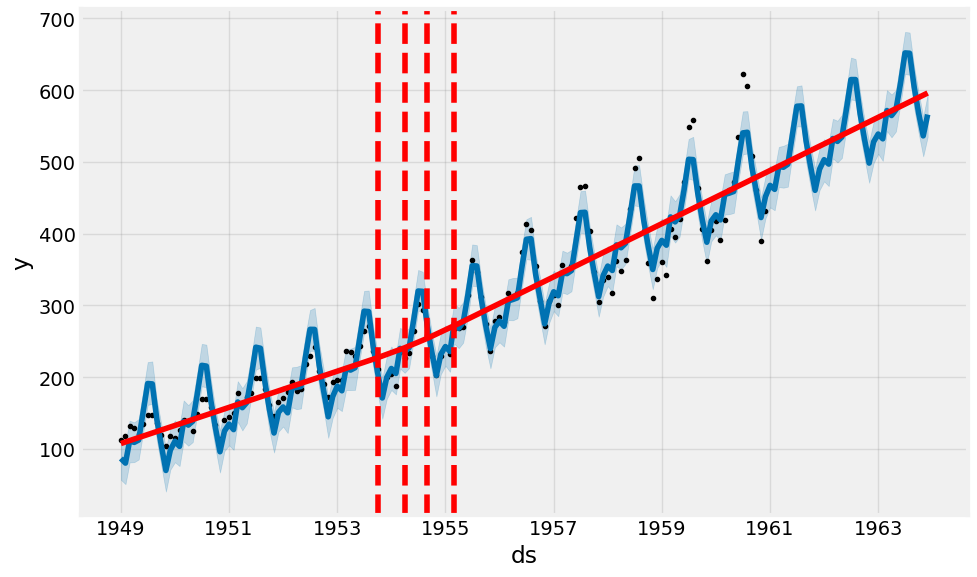

In [91]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

# **9. Adjusting Trend** <a class="anchor" id="9"></a>


[Table of Contents](#0.1)


- Prophet allows us to adjust the trend in case there is an overfit or underfit.

- *changepoint_prior_scale* helps adjust the strength of the trend.

- Default value for *changepoint_prior_scale* is 0.05.

- Decrease the value to make the trend less flexible.

- Increase the value of changepoint_prior_scale to make the trend more flexible.

- Increasing the *changepoint_prior_scale* to 0.08 to make the trend flexible.


13:07:14 - cmdstanpy - INFO - Chain [1] start processing
13:07:14 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\user\anaconda3\envs\tf\lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\user\anaconda3\envs\tf\lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



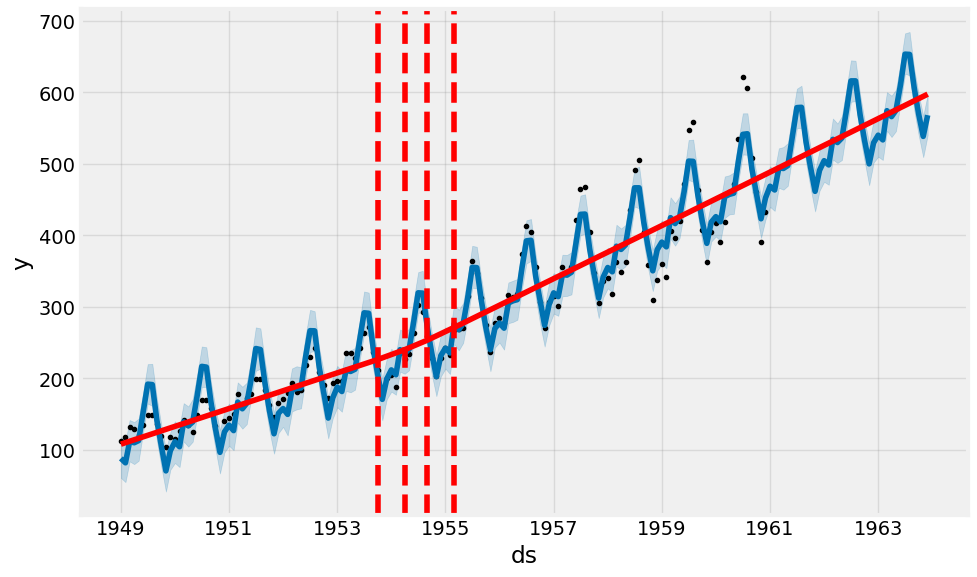

In [89]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

- Decreasing the *changepoint_prior_scale* to 0.001 to make the trend less flexible.

13:07:15 - cmdstanpy - INFO - Chain [1] start processing
13:07:15 - cmdstanpy - INFO - Chain [1] done processing
13:07:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:07:15 - cmdstanpy - INFO - Chain [1] start processing
13:07:15 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\user\anaconda3\envs\tf\lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\user\anaconda3\envs\tf\lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the 

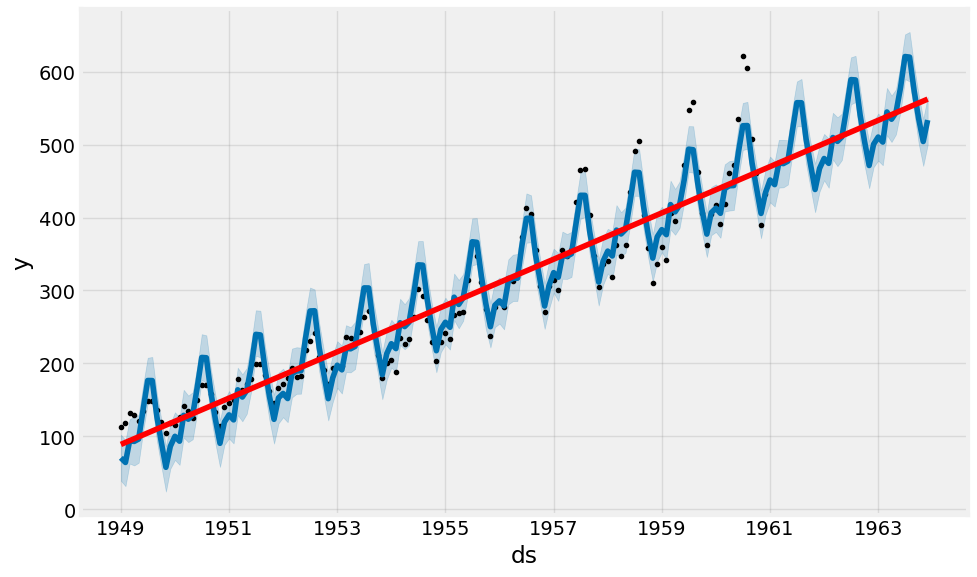

In [90]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

# **10. Conclusion** <a class="anchor" id="10"></a>


[Table of Contents](#0.1)


- In this tutorial, we described how to use the Prophet library to perform time series forecasting in Python.

- We have been using out-of-the box parameters, but Prophet enables us to specify many more arguments.

- In particular, Prophet provides the functionality to bring your own knowledge about time series to the table.